# GRT Full Analysis

In this notebook we perform a full analysis using the tools of gravray

In [1]:
from gravray import *
from gravray.util import *
from gravray.stats import *
from gravray.spice import *
from gravray.plot import *
from gravray.sampling import *
from gravray.orbit import *

from tqdm import tqdm
from matplotlib.colors import LogNorm

from sys import argv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib nbagg

## Initialize

In [3]:
dt=elTime(0)
Spice.loadKernels()
cneos=pd.read_csv("data/cneos_fireball_data_location.csv")
cneos.set_index("Name",inplace=True)

In [4]:
cneos.head(50)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Aloc,hloc,vimp,Ephemeris Date,lat,lon
Name,,,,,,,,,,,,,,,,
CNEOS-2013-02-15,2013-02-15 03:20:33,54.8N,61.1E,23.30,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0,99.896113,15.924142,-18.614242,02/15/2013 03:20:33 UTC,54.8,61.1
CNEOS-2018-12-18,2018-12-18 23:48:20,56.9N,172.4E,25.60,32.0,6.3,-3.0,-31.2,1.300000e+14,173.0,349.433476,68.586703,-31.970768,12/18/2018 23:48:20 UTC,56.9,172.4
CNEOS-2010-12-25,2010-12-25 23:24:00,38.0N,158.0E,26.00,18.1,18.0,-2.0,-4.0,2.000000e+13,33.0,147.196052,60.888747,-18.547237,12/25/2010 23:24:00 UTC,38.0,158.0
CNEOS-2009-10-08,2009-10-08 02:57:00,4.2S,120.6E,19.10,19.2,14.0,-16.0,-6.0,2.000000e+13,33.0,27.463598,67.457494,-22.090722,10/08/2009 02:57:00 UTC,-4.2,120.6
CNEOS-1994-02-01,1994-02-01 22:38:09,2.7N,164.1E,33.33,-1.0,0.0,0.0,0.0,1.820000e+13,30.0,0.000000,0.000000,-0.000000,02/01/1994 22:38:09 UTC,2.7,164.1
CNEOS-2009-11-21,2009-11-21 20:53:00,22.0S,29.2E,38.00,32.1,3.0,-17.0,27.0,1.000000e+13,18.0,144.561055,28.672847,-32.046841,11/21/2009 20:53:00 UTC,-22.0,29.2
CNEOS-2004-10-07,2004-10-07 13:14:43,27.3S,71.5E,35.00,19.2,-15.3,1.0,11.6,1.040000e+13,18.0,240.127781,27.211713,-19.226284,10/07/2004 13:14:43 UTC,-27.3,71.5
CNEOS-2010-07-06,2010-07-06 23:54:43,34.1S,174.5W,26.00,15.7,12.1,10.0,0.2,7.560000e+12,14.0,50.988395,43.867464,-15.698726,07/06/2010 23:54:43 UTC,-34.1,-174.5
CNEOS-2006-12-09,2006-12-09 06:31:12,26.2N,26.0E,26.50,15.9,4.9,-15.0,1.6,7.410000e+12,14.0,98.709425,4.490952,-15.860958,12/09/2006 06:31:12 UTC,26.2,26.0


## Location

In [5]:
body="EARTH"
earth=Body(body)

In [6]:
#argv[1]="CNEOS-2018-07-25"
#argv[1]="Chelyabinsk"
argv[1]="Viñales"
site=argv[1]

In [7]:
if re.search("CNEOS-",site):
    print("CNEOS Site")
    impact=cneos.loc[site]
    lon=impact["lon"]*Angle.Deg
    lat=impact["lat"]*Angle.Deg
    alt=impact["Altitude (km)"]*Const.km
    Aloc=impact["Aloc"]*Angle.Deg
    hloc=impact["hloc"]*Angle.Deg
    vimp=impact["vimp"]*Const.km/Const.s
    location=Location(earth,lon,lat,alt)
    datestring=impact["Ephemeris Date"].replace(" UTC","")
    fmt="%m/%d/%Y %H:%M:%S"

if site=="Bering_CNEOS":
    lon=172.4*Angle.Deg #rad
    lat=56.9*Angle.Deg #rad
    alt=25.6*Const.km #m
    vbod=np.array([6.3,-3.0,-31.2])*Const.km/Const.s
    location=Location(earth,lon,lat,alt)
    Aloc,hloc,vimp=location.vbod2loc(-vbod)
    datestring="2018-12-18 23:48:20"
    fmt="%Y-%m-%d %H:%M:%S"

if site=="Chelyabinsk_CNEOS":
    lon=61.1**Angle.Deg #rad
    lat=54.8*Angle.Deg #rad
    alt=23.3*Const.km #m
    vbod=np.array([+12.8,-13.3,-2.4])*Const.km/Const.s
    location=Location(earth,lon,lat,alt)
    Aloc,hloc,vimp=location.vbod2loc(-vbod)
    datestring="2013-02-15 03:20:33"
    fmt="%Y-%m-%d %H:%M:%S"

if site=="Chelyabinsk":
    lon=59.8703**Angle.Deg #rad
    lat=55.0958*Angle.Deg #rad
    alt=23.3*Const.km #m
    vimp=-18.6*Const.km/Const.s
    Aloc=103.5*Angle.Deg
    hloc=18.55*Angle.Deg
    location=Location(earth,lon,lat,alt)
    datestring="02/15/2013 03:20:34"
    fmt="%m/%d/%Y %H:%M:%S"

if site=="Viñales":
    lon=-83.8037*Angle.Deg #deg
    lat=+22.8820*Angle.Deg #deg
    alt=70.0*Const.km #m
    vimp=-16.9*Const.km/Const.s
    Aloc=178.9*Angle.Deg
    hloc=31.8*Angle.Deg
    location=Location(earth,lon,lat,alt)
    datestring="02/01/2019 18:17:10"
    fmt="%m/%d/%Y %H:%M:%S"

#Input conditions
print(f"Location: {site}")
print(f"\tDate: {datestring}")
print(f"\tlon. {lon*Angle.Rad:.4g}, lat. {lat*Angle.Rad:.4g}, alt. {alt/Const.km:.4g} km")
print(f"\tAloc = {Aloc*Angle.Rad:.4g}, hloc = {lat*Angle.Rad:.4g}, vimp = {vimp/Const.km} km/s")

#Common derivative
pref=f"siteanalysis-{site}"
tdb=Spice.str2tdb(datestring)
ray=GrtRay(location,Aloc,hloc,vimp)
ray.updateRay(tdb)
ray.propagateRay(tdb)
ray.terminal.calcUelements([Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
locelements=ray.terminal.uelements
print(f"Terminal elements for {site}:",Util.transformElements(ray.terminal.elements,[1/Const.au,Angle.Rad]))
print("Unbound terminal elements:",locelements)

Location: Viñales
	Date: 02/01/2019 18:17:10
	lon. -83.8, lat. 22.88, alt. 70 km
	Aloc = 178.9, hloc = 22.88, vimp = -16.9 km/s
Terminal elements for Viñales: [  0.72872754   0.38561786  11.26524373 132.10926992 272.70876869
  43.79421598]
Unbound terminal elements: [ 0.9881762  -0.46577024 -2.70660578 -0.54523688  1.13915443 -1.97689146]


<IPython.core.display.Javascript object>


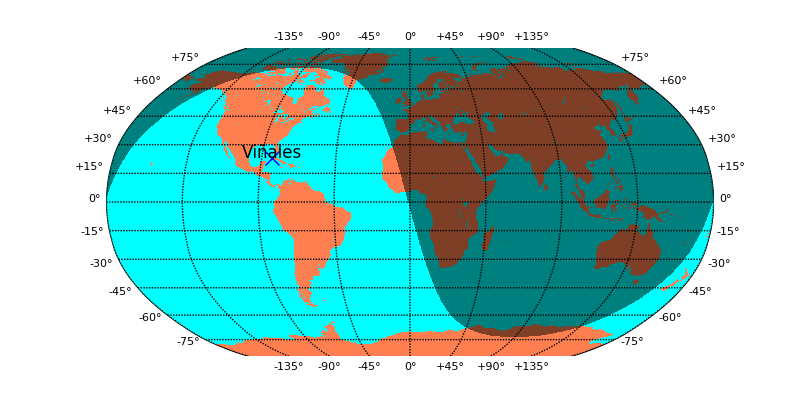

In [8]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
m=Map("surface")
m.drawmeridians.update(dict(fontsize=8))
m.drawparallels.update(dict(fontsize=8))
m.date=datetime.strptime(datestring,fmt)
m.drawMap(ax)

In [9]:
p=m.plotMap(lon*Angle.Rad,lat*Angle.Rad,marker='x',ms=10,color='b')
t=m.textMap(lon*Angle.Rad,lat*Angle.Rad,site,ha="center",fontsize=12)
fig.savefig(f"figures/{pref}-map-location.png")

## Generate directions in the sky

In [10]:
sample=Sample(100)
sample.genUnitHemisphere()
sample.purgeSample()
As=sample.pp[:,1]
hs=sample.pp[:,2]

<IPython.core.display.Javascript object>


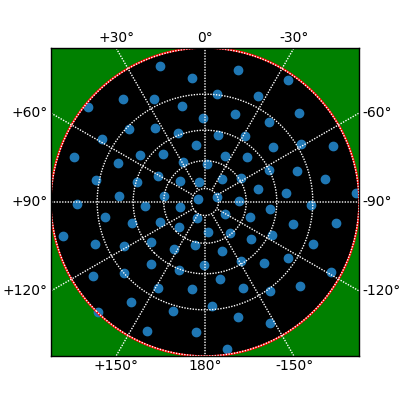

In [11]:
fig=plt.figure(figsize=(4,4))
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)

In [12]:
s=m.scatterMap(As*Angle.Rad,hs*Angle.Rad)

## Compute rays

In [13]:
#We have a distribution of points in N-d
"""
weights=[0.6]
locs=[
    [0.5,0.5,-2.0],
    [2.0,0.3,-2.6]
]
scales=[
    [1.3,0.7,0.5],
    [0.4,0.9,1.6]
]
angles=[
    [-40.0*Angle.Deg,-86.0*Angle.Deg,0.0*Angle.Deg],
    [+80.0*Angle.Deg,-109.0*Angle.Deg,0.0*Angle.Deg]
]
ranges=[
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)],
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)]
]
#"""
#"""
pref=f"siteanalysis_single-{site}"
#1 single MND
weights=[1.0]
locs=[
    [-2.0,0.3,-2.6]
]
scales=[
    [0.4,0.9,1.6]
]
angles=[
    [+0.0*Angle.Deg,0.0*Angle.Deg,0.0*Angle.Deg]
]
ranges=[
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)],
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)]
]
#"""
mnd=MultiVariate([1,1,1,0,0])
mnd.setUnflatten(weights,locs,scales,angles,ranges)

In [14]:
rays=pd.DataFrame()
for A,h in tqdm(zip(As,hs)):
    ray=GrtRay(location,A,h,vimp)
    ray.updateRay(tdb)
    try:
        ray.propagateRay(tdb)
        #J = |dEhel/dRimp| = |dchel/dRimp| x |dehel/dchel| x |dEhel/dehel| 
        detJ=ray.calcJacobianDeterminant()*\
             (1-ray.terminal.elements[1])*\
             Jacobians.calcDetMapJacobian(ray.terminal.elements,
                                          [Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])[0]
        if ray.terminal.elements[1]<1:
            ray.terminal.calcUelements(maxvalues=[1.02*Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
            x=ray.terminal.uelements[:5]
            ph=mnd.pdf(x)
        else:
            ph=0
    except AssertionError as e:
        detJ=0
        ph=0
    raydf=ray.packRay()
    raydf["detJ"]=np.abs(detJ)
    raydf["ph"]=ph
    raydf["pi"]=ph*np.abs(detJ)
    rays=pd.concat((rays,raydf))
rays.reset_index(inplace=True)

100it [00:04, 24.87it/s]


## Visualize orbits in Elements Space

In [15]:
Util.log=np.log

In [16]:
rays_bound=rays[rays["e"]<=1]
rays_bound["Q"]=Util.fin2Inf(rays_bound["q"])
rays_bound["E"]=Util.fin2Inf(rays_bound["e"])
rays_bound["I"]=Util.fin2Inf(rays_bound["i"],180)
rays_bound["O"]=Util.fin2Inf(rays_bound["W"],360)
rays_bound["P"]=Util.fin2Inf(rays_bound["w"],360)

In [17]:
rays_bound[["q","e","i","W","w"]].describe()

,q,e,i,W,w
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.756824,0.554381,12.344456,248.466806,186.818593
std,0.257074,0.230117,7.241353,86.442472,109.355218
min,0.200213,0.050877,0.216383,132.102369,0.544963
25%,0.567760,0.392516,6.909799,132.129730,113.493058
50%,0.893297,0.543705,12.013792,312.069326,194.088166
75%,0.971682,0.718740,18.438759,312.084048,276.248523
max,0.991392,0.999930,25.678956,312.087260,357.967198


In [18]:
elements=rays_bound[["Q","E","I","O","P"]]
elements.describe()

,Q,E,I,O,P
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.892640,0.431722,-2.910413,1.018598,0.023994
std,1.883063,1.612440,1.011450,1.161843,2.213518
min,-1.384964,-2.926136,-6.722458,-0.545319,-6.491627
25%,0.273306,-0.436765,-3.220987,-0.544992,-0.776902
50%,2.124873,0.175269,-2.637827,1.873470,0.156856
75%,3.535710,0.938284,-2.170493,1.873824,1.193825
max,4.746361,9.564657,-1.793363,1.873901,5.171026


<IPython.core.display.Javascript object>


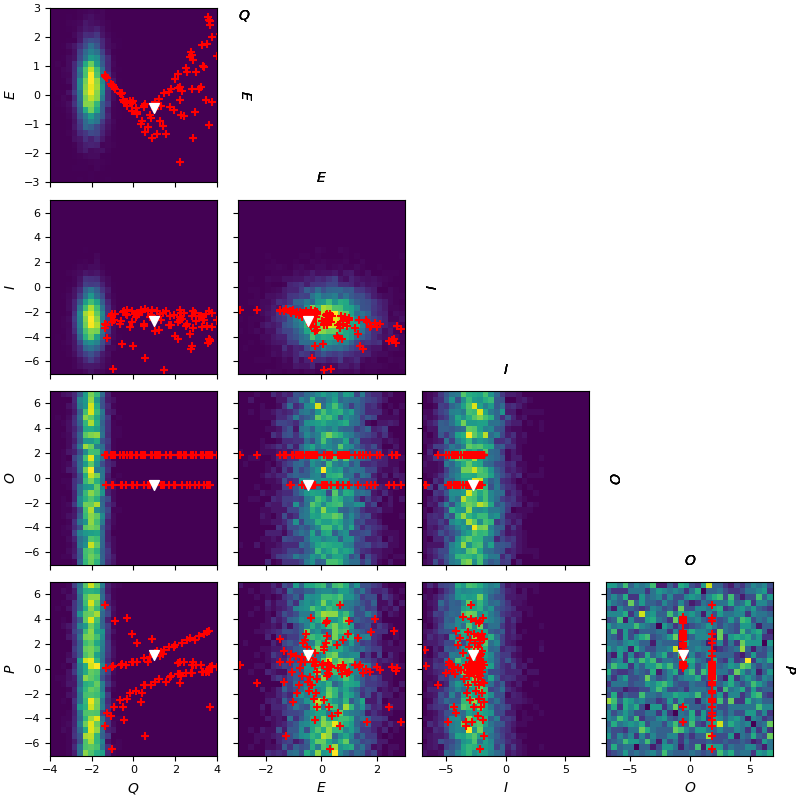

In [19]:
ps=mnd.rvs(10000)
properties=dict(
    Q=dict(label=r"$Q$",range=(-4,4)),
    E=dict(label=r"$E$",range=(-3,3)),
    I=dict(label=r"$I$",range=(-7,7)),
    O=dict(label=r"$O$",range=(-7,7)),
    P=dict(label=r"$P$",range=(-7,7)),
)
G=PlotGrid(properties,figsize=2)
h=G.plotHist(ps,bins=30)

In [20]:
s=G.scatterPlot(elements.values,color='r',marker='+')
s=G.scatterPlot(np.array([locelements[:5]]),color='w',marker='v',s=50)

In [21]:
G.fig.savefig(f"figures/{pref}-orbital-footprint.png")

## Visualize probability and Jacobian

In [22]:
rays["1/|log10(detJ)|"]=1/np.abs(np.log10(rays["detJ"]))
rays["1/|log10(ph)|"]=1/np.abs(np.log10(rays["ph"]))
rays["1/|log10(pi)|"]=1/np.abs(np.log10(rays["pi"]))

<IPython.core.display.Javascript object>


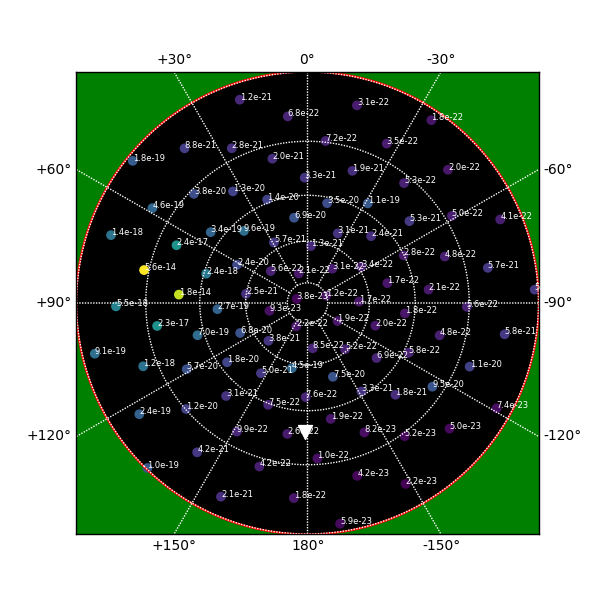

In [23]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
scs=[]
ts=[]
qp=0

In [24]:
if qp:
    for s in scs:s.remove() 
    for t in ts:t.remove() 
    scs=[];ts=[];qp=0

In [25]:
scs+=[m.scatterMap(rays["A"].values,rays["h"].values,c=rays["1/|log10(detJ)|"].values)]
scs+=[m.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')]
for ind in rays.index:
    A=rays.loc[ind]["A"]
    h=rays.loc[ind]["h"]
    detJ=rays.loc[ind]["detJ"]
    ts+=[m.textMap(A,h,f"{detJ:.1e}",fontsize=6,color='w')]
qp=1

In [26]:
fig.savefig(f"figures/{pref}-sky-jacobian.png")

<IPython.core.display.Javascript object>


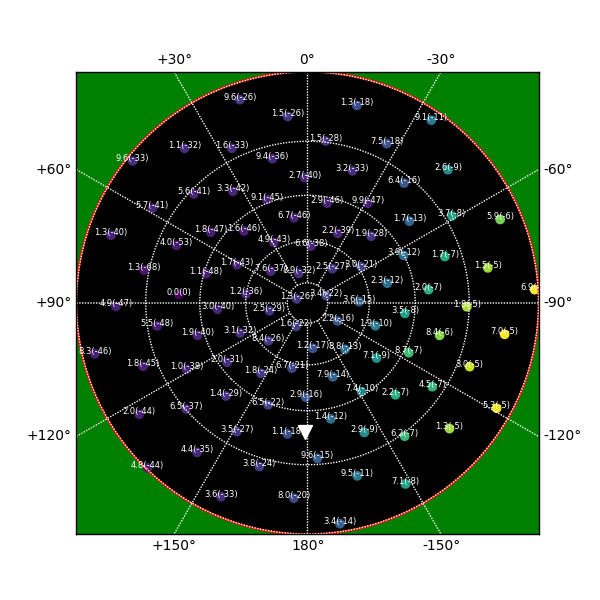

In [27]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
m2=Map("sky")
m2.drawMap(ax)
scs2=[]
ts2=[]
qp2=0

In [28]:
if qp2:
    for s in scs2:s.remove() 
    for t in ts2:t.remove() 
    scs2=[];ts2=[];qp2=0

In [29]:
scs2+=[m2.scatterMap(rays["A"].values,rays["h"].values,c=rays["1/|log10(ph)|"].values)]
scs2+=[m2.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')]
for ind in rays.index:
    A=rays.loc[ind]["A"]
    h=rays.loc[ind]["h"]
    phm,phe=Util.mantisaExp(rays.loc[ind]["ph"])
    ts2+=[m2.textMap(A,h,f"{phm:.1f}({phe})",fontsize=6,color='w',ha='center')]
qp2=1

In [30]:
fig.savefig(f"figures/{pref}-sky-porb.png")

<IPython.core.display.Javascript object>


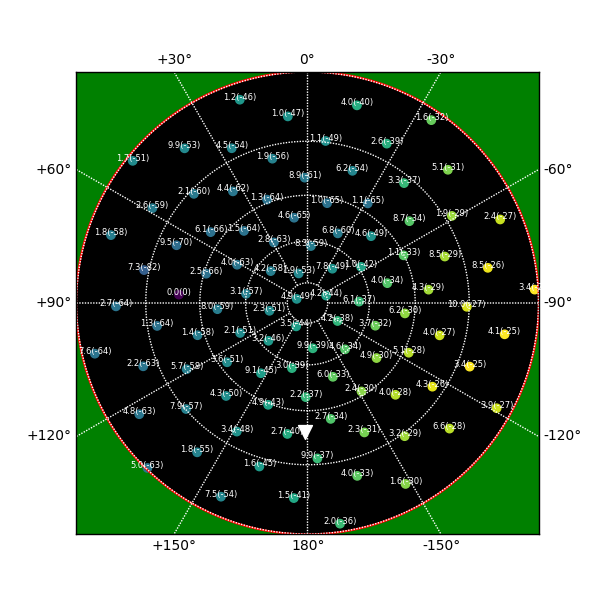

In [31]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
m3=Map("sky")
m3.drawMap(ax)
scs3=[]
ts3=[]
qp3=0

In [32]:
if qp3:
    for s in scs3:s.remove() 
    for t in ts3:t.remove() 
    scs3=[];ts3=[];qp=0

In [33]:
scs3+=[m3.scatterMap(rays["A"].values,rays["h"].values,c=rays["1/|log10(pi)|"].values,marker='o')]
scs3+=[m3.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')]
for ind in rays.index:
    A=rays.loc[ind]["A"]
    h=rays.loc[ind]["h"]
    pim,pie=Util.mantisaExp(rays.loc[ind]["pi"])
    ts3+=[m3.textMap(A,h,f"{pim:.1f}({pie})",fontsize=6,color='w',ha='center')]
qp3=1

In [34]:
fig.savefig(f"figures/{pref}-sky-pimp.png")

## Contours

In [35]:
m=Map("sky")

In [36]:
nAs=nhs=20
nAs,nhs,As,hs,val=m.makeGrid(nAs,nhs)

In [37]:
detJs=np.zeros_like(val)
phs=np.zeros_like(val)
pis=np.zeros_like(val)
dirs=[]
for i in tqdm(range(nhs)):
    for j in range(nAs):
        h=hs[i,j]
        A=As[i,j]
        if h<0:
            detJ=0
            ph=0
        else:
            for v in [vimp]:
            #for vimp in np.linspace(11.1,43.0,10):
                #ray=GrtRay(location,A*Angle.Deg,h*Angle.Deg,-18.6*Const.km/Const.s)
                ray=GrtRay(location,A*Angle.Deg,h*Angle.Deg,v)
                ray.updateRay(tdb)
                try:
                    ray.propagateRay(tdb)
                    #J = |dEhel/dRimp| = |dchel/dRimp| x |dehel/dchel| x |dEhel/dehel| 
                    detJ=ray.calcJacobianDeterminant()*\
                         (1-ray.terminal.elements[1])*\
                         Jacobians.calcDetMapJacobian(ray.terminal.elements,
                                                      [Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])[0]
                    if ray.terminal.elements[1]<1:
                        ray.terminal.calcUelements(maxvalues=[Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
                        x=ray.terminal.uelements[:5]
                        ph=mnd.pdf(x)
                    else:
                        ph=0
                except AssertionError as e:
                    detJ=0
                    ph=0
                detJs[i,j]+=np.abs(detJ)
                phs[i,j]+=ph
                pis[i,j]+=ph*np.abs(detJ)


100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


<IPython.core.display.Javascript object>


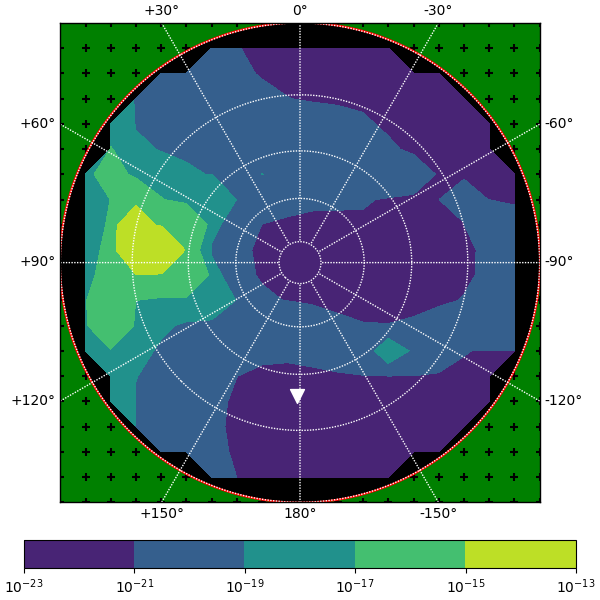

In [38]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
ms=Map("sky")
ms.drawMap(ax)
ms.scatterMap(As,hs,marker='+',color='k')
cont=ms.area.contourf(As,hs,detJs,levels=1000,latlon=True,norm=LogNorm())
cbar=fig.colorbar(cont,drawedges=False,orientation="horizontal")
ms.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')

In [39]:
fig.savefig(f"figures/{pref}-sky-contdetJ.png")

<IPython.core.display.Javascript object>


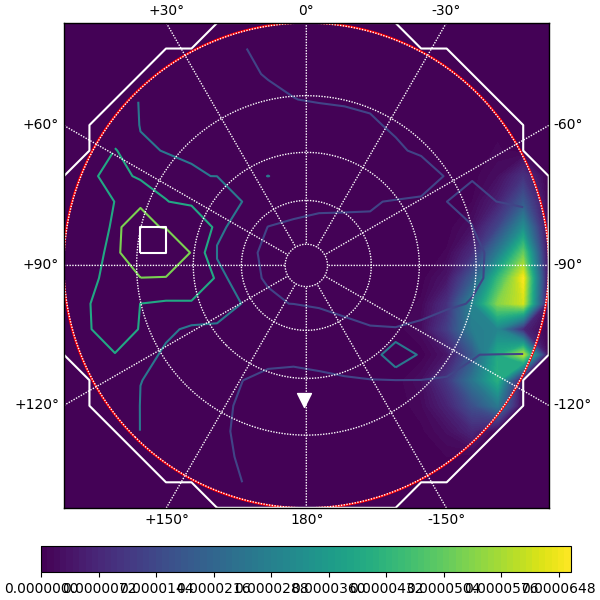

In [40]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
ms=Map("sky")
ms.drawMap(ax)
ms.scatterMap(As,hs,marker='+',color='k')
ms.area.contour(As,hs,detJs,latlon=True,norm=LogNorm())
xs,ys=ms.area(As,hs)
cont=ax.contour(xs,ys,phs,levels=[0],colors=["w"])
cont=ax.contourf(xs,ys,phs,levels=100)
cbar=fig.colorbar(cont,drawedges=False,orientation="horizontal")
ms.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')

In [41]:
fig.savefig(f"figures/{pref}-sky-contpi.png")

<IPython.core.display.Javascript object>


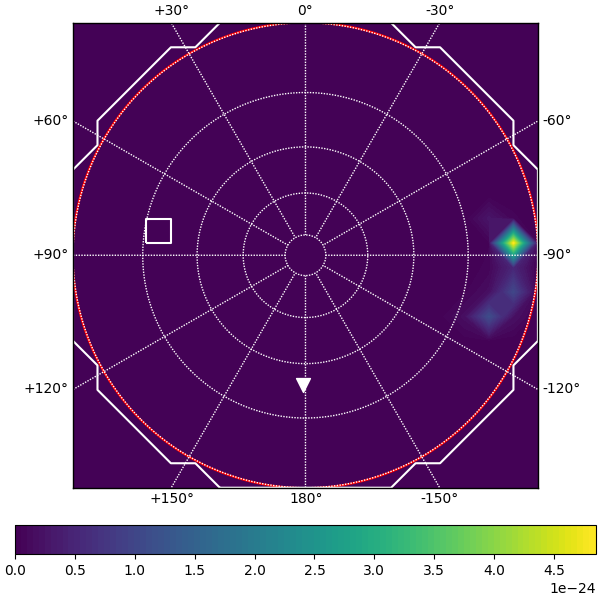

In [42]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
ms=Map("sky")
ms.drawMap(ax)
ms.scatterMap(As,hs,marker='+',color='k')
xs,ys=ms.area(As,hs)
cont=ax.contour(xs,ys,phs,levels=[0],colors=["w"])
cont=ax.contourf(xs,ys,pis,levels=100) #,norm=LogNorm())
cbar=fig.colorbar(cont,drawedges=False,orientation="horizontal")
ms.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')

In [43]:
fig.savefig(f"figures/{pref}-sky-contph.png")

In [44]:
dt=elTime(1)

Elapsed time since last call: 1.28733 min


In [45]:
pis.sum(),pis.max()

(8.638155559721112e-24, 4.834897333271139e-24)

In [46]:
phs.sum(),phs.max()

(0.0008014623023424604, 6.566447031334896e-05)